In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

%matplotlib inline

In [2]:
df = pd.read_csv('worldcities.csv')

In [3]:
df

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140
...,...,...,...,...,...,...,...,...,...,...,...
26564,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,Sermersooq,NaN,10.0,1304217709
26565,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491
26566,Cheremoshna,Cheremoshna,51.3894,30.0989,Ukraine,UA,UKR,Kyyivs’ka Oblast’,NaN,0.0,1804043438
26567,Ambarchik,Ambarchik,69.6510,162.3336,Russia,RU,RUS,Sakha (Yakutiya),NaN,0.0,1643739159


<AxesSubplot:xlabel='lat', ylabel='lng'>

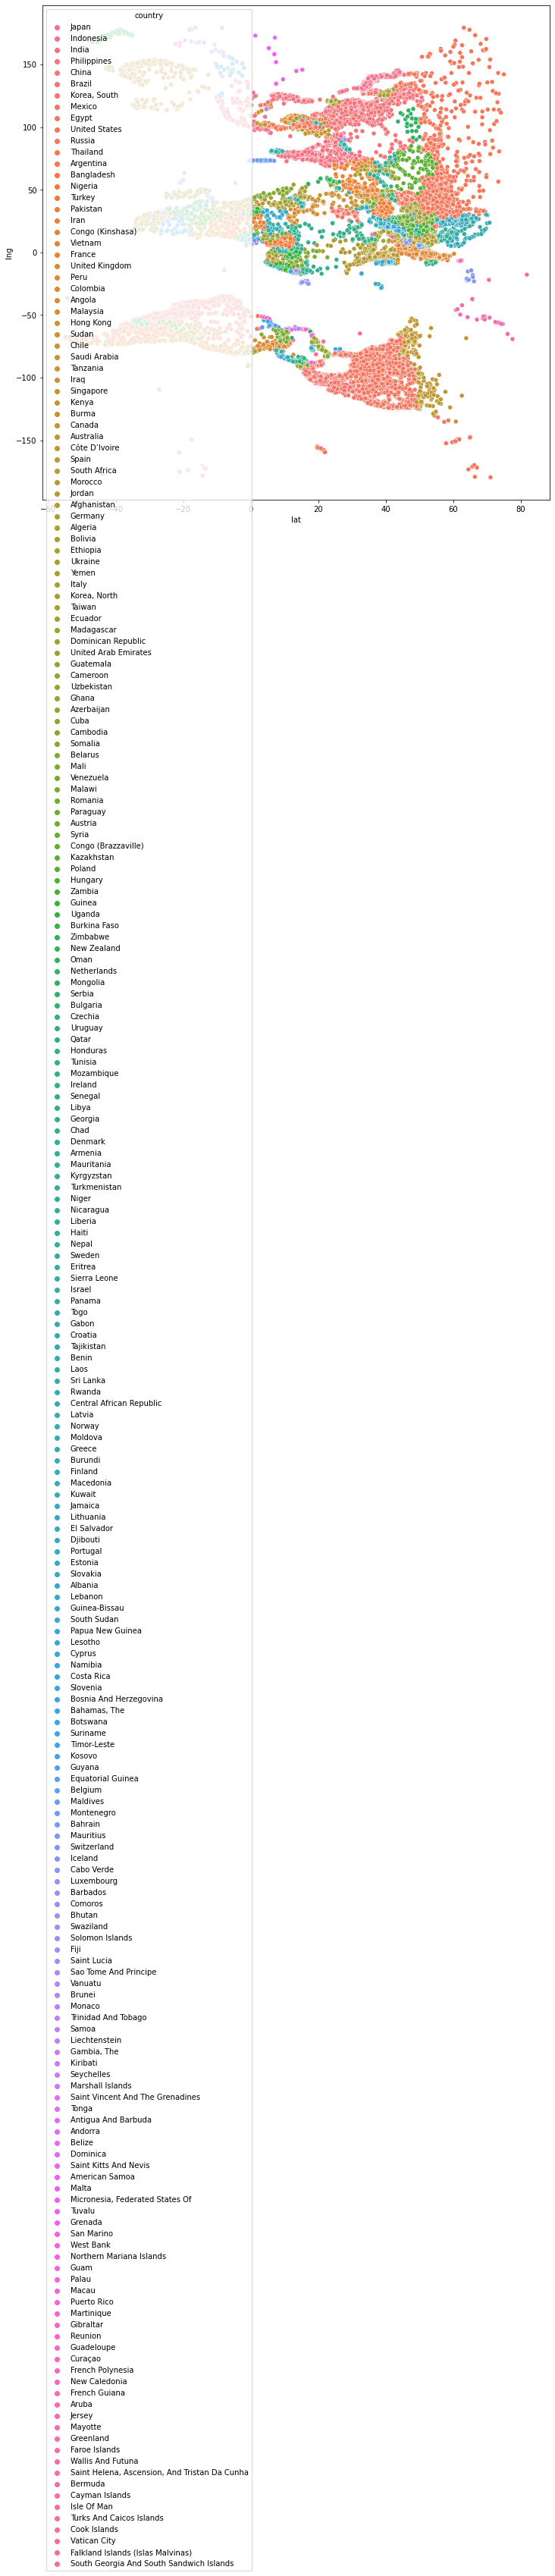

In [7]:
plt.figure(figsize=(12,12))
sns.scatterplot(x='lat',y='lng',data=df,hue='country')

In [11]:
df['country'].value_counts()

United States          7768
United Kingdom         1798
Germany                1606
Russia                 1161
Japan                   827
                       ... 
Tuvalu                    1
Cayman Islands            1
Bermuda                   1
Mayotte                   1
Antigua And Barbuda       1
Name: country, Length: 224, dtype: int64

In [12]:
df['admin_name'].value_counts()

California          650
Pennsylvania        617
New York            594
Florida             472
São Paulo           430
                   ... 
El Paraíso            1
Mayo                  1
Burtnieku Novads      1
Aleksinac             1
Porto Novo            1
Name: admin_name, Length: 4013, dtype: int64

In [14]:
mas_df = df[df['country'] == 'Malaysia']

In [16]:
mas_df

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
53,Kuala Lumpur,Kuala Lumpur,3.1478,101.6953,Malaysia,MY,MYS,Kuala Lumpur,primary,8285000.0,1458988644
901,Klang,Klang,3.0333,101.4500,Malaysia,MY,MYS,Selangor,NaN,878000.0,1458509635
913,Ipoh,Ipoh,4.6000,101.0700,Malaysia,MY,MYS,Perak,admin,866772.0,1458423505
945,Butterworth,Butterworth,5.3942,100.3664,Malaysia,MY,MYS,Pulau Pinang,NaN,821652.0,1458469233
1041,George Town,George Town,5.4145,100.3292,Malaysia,MY,MYS,Pulau Pinang,admin,708127.0,1458236750
1129,Petaling Jaya,Petaling Jaya,3.1073,101.6067,Malaysia,MY,MYS,Selangor,NaN,638516.0,1458989343
1185,Kuantan,Kuantan,3.8167,103.3333,Malaysia,MY,MYS,Pahang,admin,607778.0,1458763489
1214,Shah Alam,Shah Alam,3.0833,101.5333,Malaysia,MY,MYS,Selangor,admin,584340.0,1458194263
1372,Johor Bahru,Johor Bahru,1.4556,103.7611,Malaysia,MY,MYS,Johor,admin,497097.0,1458747615
1382,Kota Bharu,Kota Bharu,6.1333,102.2500,Malaysia,MY,MYS,Kelantan,admin,491237.0,1458150101


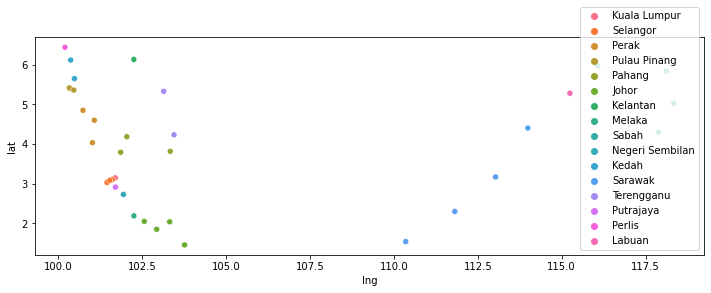

In [40]:
plt.figure(figsize=(12,4))
sns.scatterplot(x='lng',y='lat',data=mas_df,hue='admin_name')
plt.legend(bbox_to_anchor=(1,0), loc="lower right")